**INTRODUCCIÓN A LA REGRESIÓN LINEAL**

En este notebook revisaremos uno de los algoritmos iniciales de machine learning, el cual se basa en un modelo de regresión para una unica caracteristica.
Abordaremos el paso a paso del entrenamiento de un algoritmo de este tipo.

En primer lugar cargamos la base de datos, en este caso utilizaremos unicamente una carácteristica. Los datos relacionan la cantidad de horas de estudio con un target, que en este caso representa el puntaje total del estudiante en el parcial.

In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#sys.path.append('/content/drive/MyDrive/Colab Notebooks/Auto 1')
%cd '/content/drive/MyDrive/Colab Notebooks/Auto 1'
#puede confirmar su ubiación mediante:
%ls

/content/drive/MyDrive/Colab Notebooks/Auto 1
 bmi.csv                          Matplotlib_introduction.ipynb
'Clasificacion cardiacas.ipynb'   Pandas_Introduction.ipynb
 Class3and4_Operations.ipynb     'Parcial 1'/
 cricketer.csv                    RegresionLinealSimple.ipynb
 Data.csv                         Untitled0.ipynb
 EMG-data.csv                     Untitled1.ipynb
 heart.csv                        Variables.ipynb
'Laboratorio 1'/


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Auto 1/bmi.csv')
#df=df.drop(labels='Unnamed: 0',axis=1)
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


Para empezar, graficamos los datos, en este caso se usa un scatter plotcon el fin de ver como se relaciona la variable independiente (Horas de estudio) con el target (Puntaje de la prueba).


Para la graficación, se hace uso de matplotlib

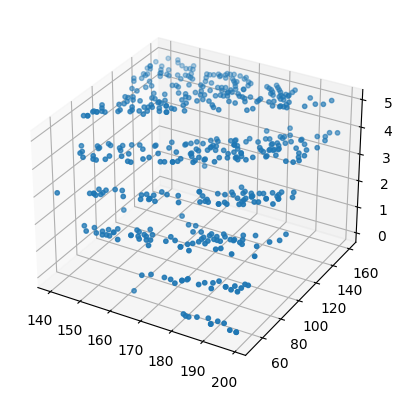

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Height'], df['Weight'], df['Index'], s=10, c=None, depthshade=True)

**FUNCIÓN PARA EL ENTRENAMIENTO DEL MODELO**

In [ ]:
# Training function: fit
def training(X, y, epochs):
    m, n = X.shape #Se extraen las dimensiones de los datos  
    lr=0.0000001        #Se define la tasa de aprendizaje
    weights = np.zeros((n,1)) #Se inicializan los pesos y el bias
    bias = 0                 #Pueden ser inicializados en 0 o de forma aleatoria
    
    y = y.reshape(m,1) #Se hace un reshape debido a que la dimensión original 
                       #es de (m,) y esto puede ocasionar inconvenientes en las operaciones
    losses = []         #Se crea una lista vacia para hacer la estimación del costo
    
    
    for epoch in range(epochs): #Bucle para el ajuste de parametros
        y_hat = np.dot(X, weights) + bias #Se hace la predicción con el w y bias inicializado
        loss = np.mean((y_hat - y)**2) #se calcula el error mediante Mean Square Error
        losses.append(loss) #Se añade el error calculado a la lista losses
        dw1 = (1/m)*np.dot(X[:,0].T, (y_hat - y)) #se calcula la derivada con respecto a w
        dw2 = (1/m)*np.dot(X[:,1].T, (y_hat - y)) #se calcula la derivada con respecto a w
        db = (1/m)*np.sum((y_hat - y)) #Se calcula la derivada con respecto al bias
        # Updating the parameters: parameter := parameter - lr*derivative
        # of loss/cost w.r.t parameter)
        weights[0] -= lr*dw1 #se hace la estimación del nuevo parametro haciendo
        weights[1] -= lr*dw2
        bias -= lr*db     #parametro= parametro - lr*derivative
    #el bucle itera el número de veces que el usuario especifique en epochs 
    return weights, bias, losses #la función retorna los ultimos pesos actualizados
                                 #el bias y la lista losses que tiene el costo en cada iteración


**SE DEFINE UNA FUNCIÓN PARA PREDECIR NUEVOS VALORES**

In [ ]:
def predict(X, weights, bias):  #La función recibe los datos, los pesos w y el bias
      #print(X.shape)
      #print(weights.shape)
      #print(np.dot(X, weights))
      return np.dot(X, weights)+ bias  #aplica un producto punto entre los datos y el bias
                                        #y retorna una estimación

**DIVISIÓN DE DATOS**

In [ ]:
X= np.array(df['Height'])
X = X.reshape(-1,1)
X2=np.array(df['Weight'])
X2 = X2.reshape(-1,1)
X=np.concatenate((X,X2), axis=1)
print(X.shape)
y = np.array(df['Index'])
X_train, X_test, y_train, y_test = X[:400,:], X[400:,:], y[:400], y[400:] #Se hace una división de datos
print(X_train.shape, y_train.shape)
w, b, l  = training(X_train, y_train, epochs=300) #se entrena con los datos de entrenamiento
#w1,b1,l1= training2(X_train, y_train, 100, 0.0000001)



(500, 2)
(400, 2) (400,)


In [ ]:
w

array([[0.01071238],
       [0.00770389]])

In [ ]:
b

6.480773538114048e-05

In [ ]:
l

[15.73,
 15.615039547568717,
 15.501009177212959,
 15.387901355004404,
 15.27570860804316,
 15.164423523963405,
 15.054038750443032,
 14.944546994717262,
 14.835941023096195,
 14.7282136604863,
 14.621357789915727,
 14.515366352063516,
 14.410232344792568,
 14.305948822686464,
 14.202508896589979,
 14.099905733153339,
 13.998132554380177,
 13.897182637179139,
 13.79704931291913,
 13.69772596698815,
 13.599206038355737,
 13.501483019138904,
 13.404550454171627,
 13.308401940577824,
 13.213031127347763,
 13.118431714917936,
 13.024597454754307,
 12.931522148938962,
 12.83919964976007,
 12.747623859305227,
 12.656788729058016,
 12.566688259497901,
 12.477316499703338,
 12.388667546958077,
 12.300735546360704,
 12.213514690437302,
 12.126999218757263,
 12.04118341755222,
 11.95606161933807,
 11.871628202540018,
 11.787877591120736,
 11.704804254211444,
 11.622402705746044,
 11.540667504098199,
 11.459593251721335,
 11.379174594791596,
 11.29940622285364,
 11.220282868469358,
 11.1417993068

**GRAFICACIÓN DE LOS DATOS Y EL MODELO PREDICTIVO DE REGRESION LINEAL**

(500,) (500,) (500,)


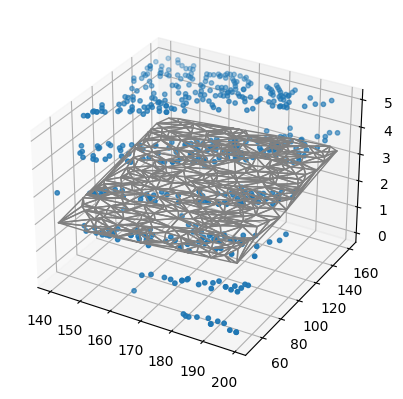

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Height'], df['Weight'], df['Index'], s=10, c=None, depthshade=True)
print(X[:,0].shape, X[:,1].shape, predict(X,w,b)[:,0].shape)
ax.plot_trisurf(X[:,0], X[:,1], predict(X,w,b)[:,0], color=(0,0,0,0), edgecolor='Gray')

In [ ]:
y_test_preds = predict(X_test, w, b) #Predecir datos de entrenamiento
compare = pd.DataFrame({'Actual':y_test, 'Predicted':list(y_test_preds)})
print(compare)
print(np.mean(y_test-y_test_preds)**2) #calcular la función de costo en los datos de test



    Actual             Predicted
0        3   [2.890184474516439]
1        4  [2.6883361015835137]
2        2  [2.4889911206897306]
3        4   [2.657885863921761]
4        4  [3.0690609308984507]
..     ...                   ...
95       5  [2.7856179860375914]
96       4  [2.9033144409769474]
97       5  [2.5582403504881164]
98       5  [2.3387921802347957]
99       5  [2.8625171550129807]

[100 rows x 2 columns]
1.3322262704738816


**Graficar la función de costo a lo largo de las iteraciones de entrenamiento**

Text(0, 0.5, 'Loss / Cost')

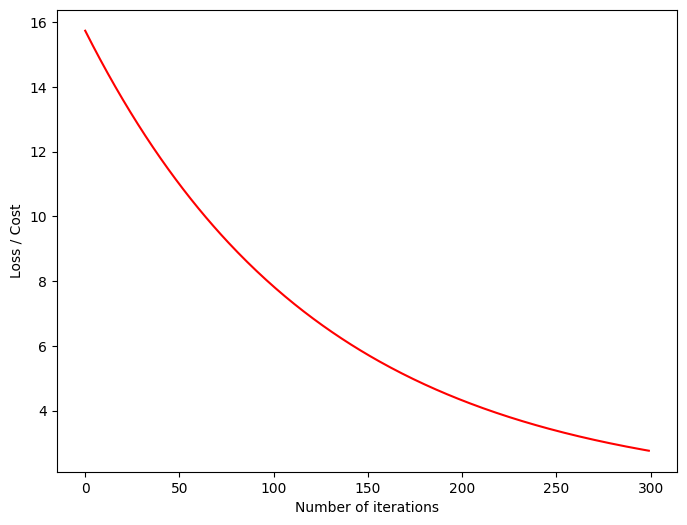

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.plot([i for i in range(300)], l, 'r-')
plt.xlabel('Number of iterations')
plt.ylabel('Loss / Cost')

Las medidas de desempeño para algoritmos de regresión lineal pueden variar según el objetivo de la predicción y las características de los datos. A continuación, se presentan algunas de las medidas más utilizadas:

Error cuadrático medio (MSE): mide la diferencia cuadrática media entre los valores observados y los predichos por el modelo.

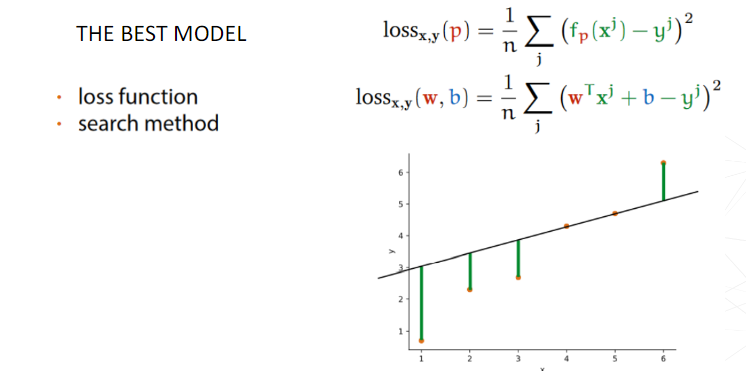

R-cuadrado (R²): es una medida de la proporción de la variabilidad en los datos que es explicada por el modelo. R² varía entre 0 y 1, siendo 1 un ajuste perfecto.

Error absoluto medio (MAE): mide la diferencia media absoluta entre los valores observados y los predichos por el modelo.

Coeficiente de correlación de Pearson (r): mide la relación lineal entre las variables de entrada y la variable de salida.

Error de predicción absoluto medio (MAPE): mide el porcentaje medio de error absoluto entre los valores observados y los predichos por el modelo.

Estas medidas se basan en la comparación entre los valores observados y los valores predichos por el modelo. La elección de la medida adecuada dependerá del objetivo de la predicción y las particularidades de los datos.